In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from utils import get_data

C:\Users\Joe Vogel\AppData\Local\Temp\ipykernel_6688\3376823894.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [21]:
speed        = '7_0'
# speed        = '7_5'
# speed        = '8_0'
# speed        = '8_5'
cma          = 'CMA_ES-BEFORE-TUNNING'
openai       = 'OPENAI_ES-BEFORE-TUNNING'
hgso         = 'HGSO-BEFORE-TUNNING'
pso          = 'PSO-BEFORE-TUNNING' 

In [26]:
df_cma = get_data(cma, speed, drop_columns=True, only_valids=True, top_ten=False)
df_hgso = get_data(hgso, speed, drop_columns=True, only_valids=True, top_ten=False)
df_openai = get_data(openai, speed, drop_columns=True, only_valids=True, top_ten=False)
df_pso = get_data(pso, speed, drop_columns=True, only_valids=True, top_ten=False)

In [27]:
df_cma

,V_S,Z,D,AEdAO,PdD,P_B,Generation,Run,Valid
1,7.0,2,0.744626,0.853629,0.886253,100.565546,1,0,True
2,7.0,2,0.779706,0.883456,0.724345,96.421334,1,0,True
3,7.0,2,0.704818,0.908918,0.863501,104.455707,1,0,True
4,7.0,2,0.763032,0.958530,0.914197,97.537844,1,0,True
7,7.0,2,0.760180,0.971828,0.895809,97.586351,1,0,True
...,...,...,...,...,...,...,...,...,...
17995,7.0,7,0.799970,0.710309,0.759154,82.961728,30,9,True
17996,7.0,7,0.799993,0.714968,0.757402,82.975606,30,9,True
17997,7.0,7,0.799997,0.718571,0.761879,82.971898,30,9,True
17998,7.0,7,0.799974,0.718228,0.768993,82.953264,30,9,True


In [33]:
filtered_df_cma = df_cma.loc[df_cma.groupby(['Run', 'Generation'])['P_B'].idxmin()]
filtered_df_hgso = df_hgso.loc[df_hgso.groupby(['Run', 'Generation'])['P_B'].idxmin()]
filtered_df_openai = df_openai.loc[df_openai.groupby(['Run', 'Generation'])['P_B'].idxmin()]
filtered_df_pso = df_pso.loc[df_pso.groupby(['Run', 'Generation'])['P_B'].idxmin()]

In [32]:
def plot(algorithm, df):
    # Configurar o tamanho da figura
    plt.figure(figsize=(12, 6))

    # Agrupar os dados filtrados por 'Run'
    grouped = df.groupby('Run')

    # Plotar cada grupo
    for name, group in grouped:
        plt.plot(group['Generation'], group['P_B'], marker='o', label=f'Run {name}')

    # Configurar títulos e rótulos
    plt.title(f'{algorithm} - Evolução de P_B ao longo das Gerações para cada Run')
    plt.xlabel('Generation')
    plt.ylabel('P_B')
    plt.legend(title='Run')
    plt.grid(True)

    # Mostrar o gráfico
    plt.show()

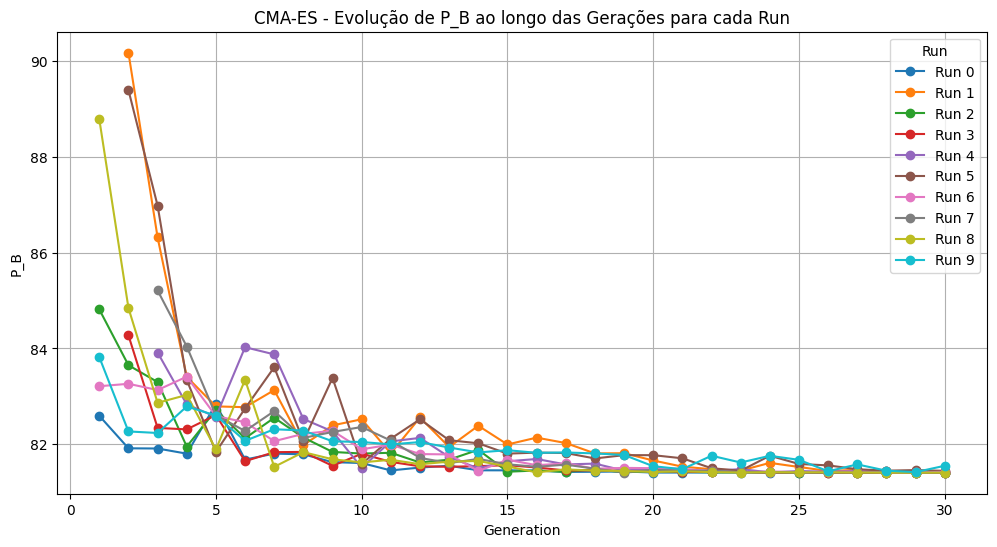

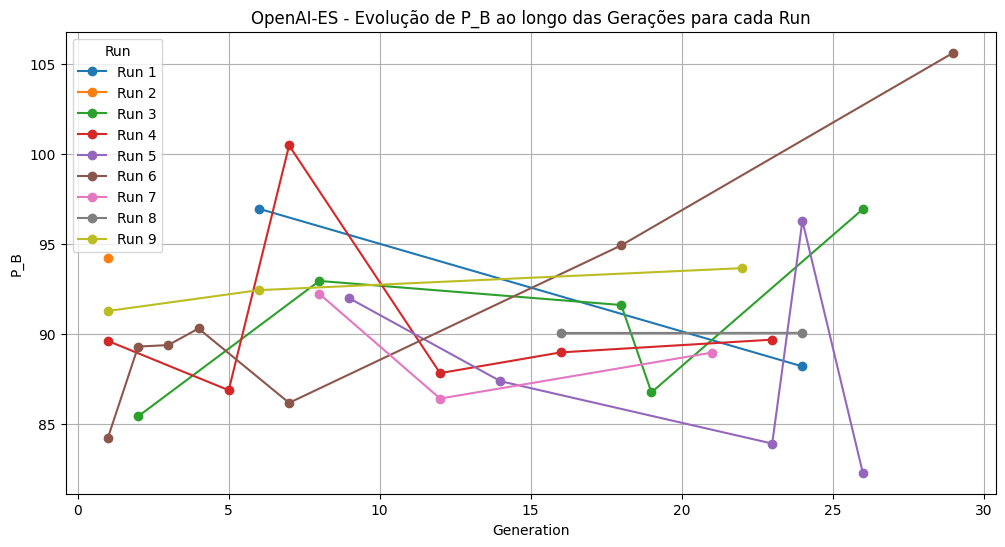

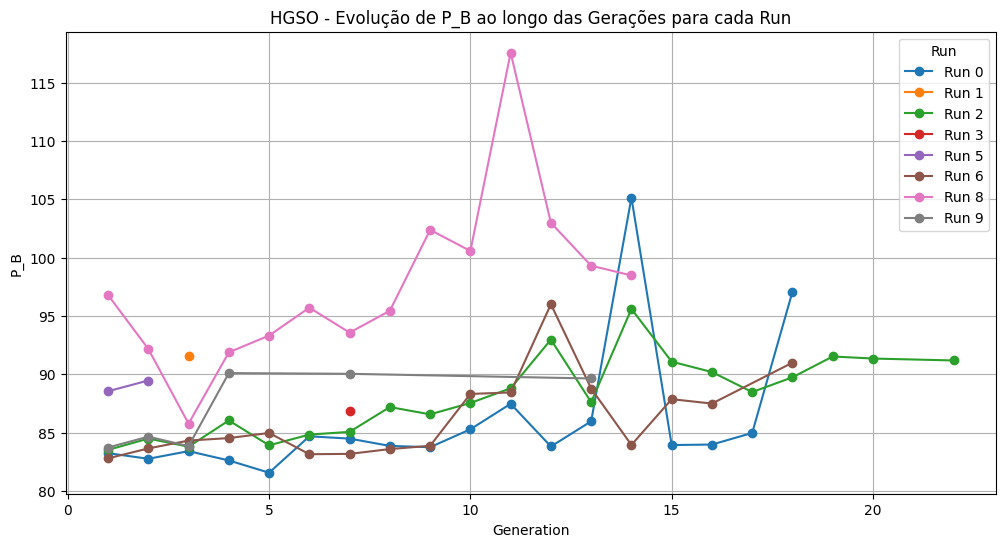

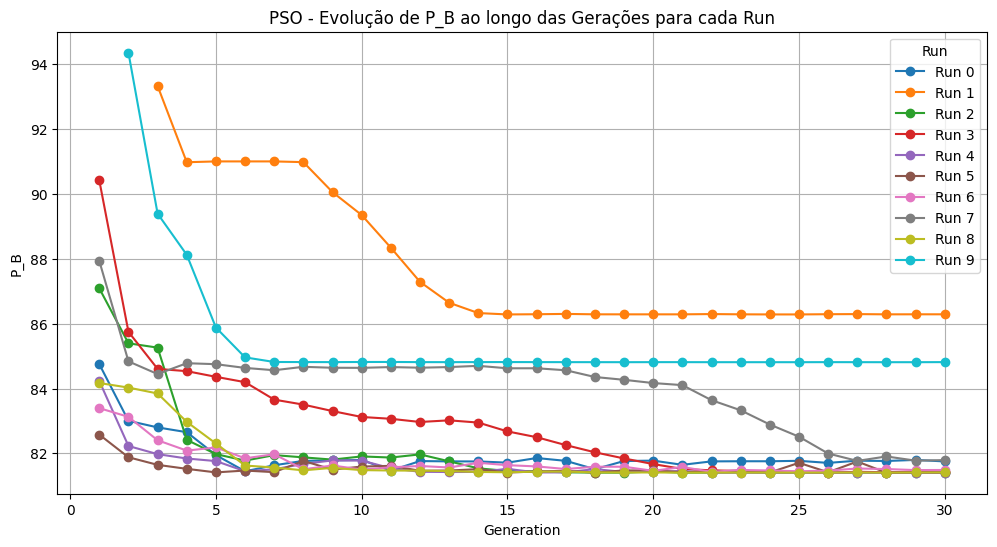

In [34]:
plot('CMA-ES', filtered_df_cma)
plot('OpenAI-ES', filtered_df_hgso)
plot('HGSO', filtered_df_openai)
plot('PSO', filtered_df_pso)